<a href="https://colab.research.google.com/github/Somesh140/ANN/blob/main/cv/TransferLearningPOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#POC proof of concept

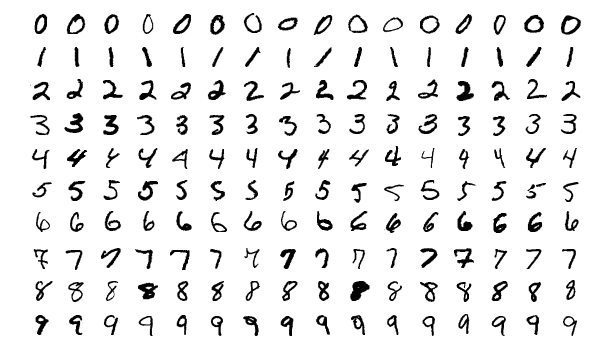

#MNIST DATASET

In [2]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
mnist=tf.keras.datasets.mnist

In [4]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
y_train_full.shape

(60000,)

In [7]:
X_train_full[0].shape

(28, 28)

In [8]:
y_train_full[0]

5

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

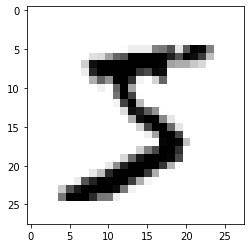

In [12]:
plt.imshow(img,cmap="binary")

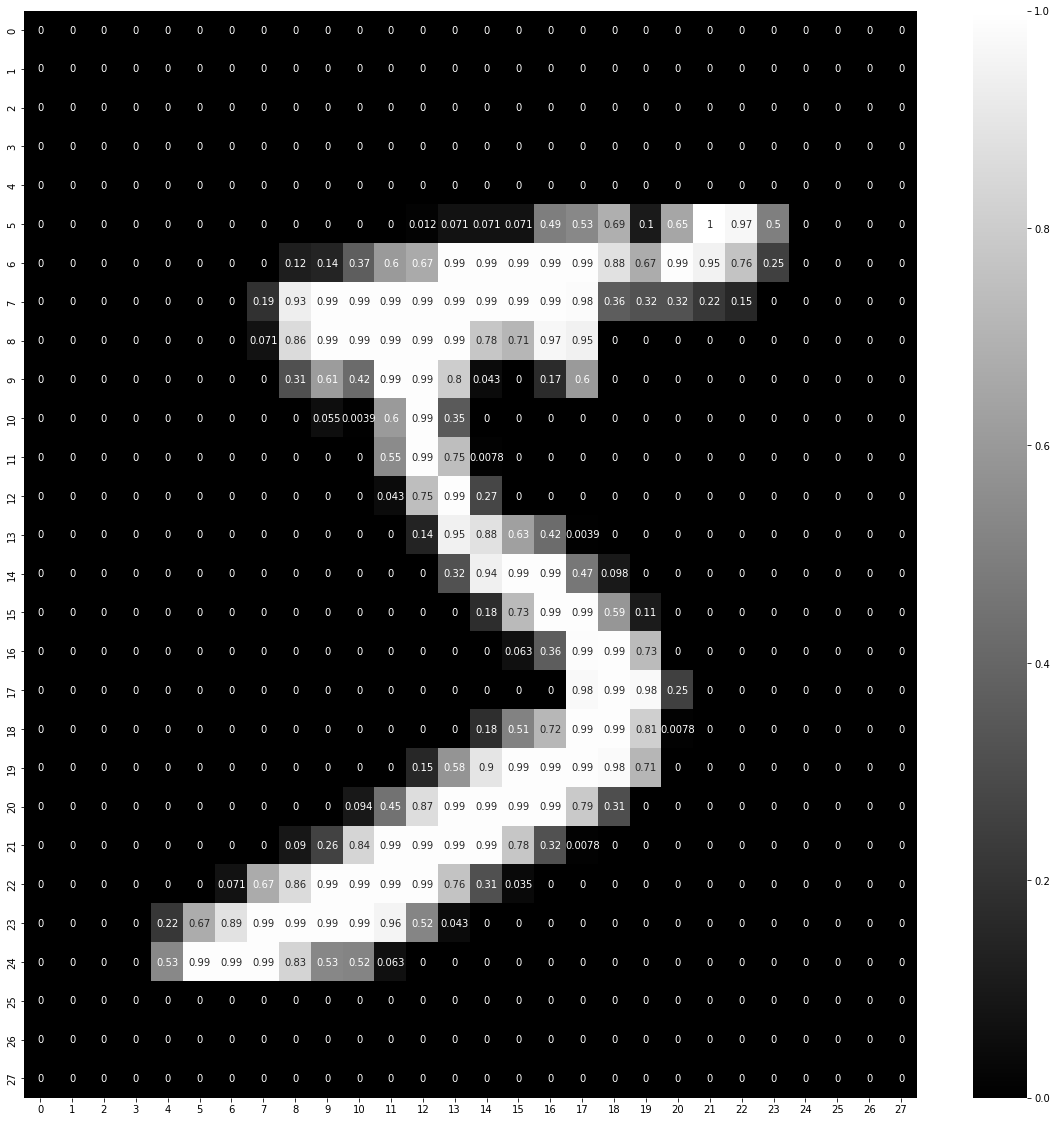

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255,annot=True,cmap="gray")

1. *0 -> 255* => More computation time, and Search space is large for finding solution.

2. *0 -> 1* => Less computation time, and Search space is small for finding solution.


In [14]:
X_valid,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

X_test =X_test/255

In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
len(np.unique(y_train))

10

# Creating ANN model

In [17]:
CLASSES=10

In [18]:
LAYERS=[
    tf.keras.layers.Flatten(input_shape=(28, 28),name="Inputlayer"),
    tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer01"),
    tf.keras.layers.Dense(100,activation="relu",name="hiddenlayer02"),
    tf.keras.layers.Dense(CLASSES,activation="softmax",name="ouputlayer"),
]

In [19]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [20]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenlayer02 (Dense)       (None, 100)               30100     
                                                                 
 ouputlayer (Dense)          (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
784*300+300

235500

In [22]:
300*100+100

30100

In [23]:
100*10+10

1010

In [24]:
LOSS_FUNCTION= "sparse_categorical_crossentropy"
OPTIMIZERS="SGD"
METRICS=["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZERS,metrics=METRICS)

In [25]:
EPOCHS=30

VALIDATION= (X_valid,y_valid)

history= model_clf.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size =32,
    validation_data=VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 12s 5ms/step - loss: 0.5843 - accuracy: 0.8485 - val_loss: 0.2987 - val_accuracy: 0.9192
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2841 - accuracy: 0.9194 - val_loss: 0.2377 - val_accuracy: 0.9346
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2324 - accuracy: 0.9343 - val_loss: 0.2009 - val_accuracy: 0.9436
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1983 - accuracy: 0.9442 - val_loss: 0.1806 - val_accuracy: 0.9492
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1738 - accuracy: 0.9508 - val_loss: 0.1579 - val_accuracy: 0.9560
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1542 - accuracy: 0.9560 - val_loss: 0.1439 - val_accuracy: 0.9606
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1381 - accuracy: 0.9604 - val_loss: 0.1331 - val_accuracy

In [26]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.584260,0.848527,0.298661,0.9192
1,0.284124,0.919418,0.237652,0.9346
2,0.232423,0.934345,0.200944,0.9436
3,0.198327,0.944200,0.180644,0.9492
4,0.173837,0.950800,0.157852,0.9560
5,0.154246,0.955982,0.143868,0.9606
6,0.138117,0.960436,0.133062,0.9640
7,0.124795,0.964909,0.124143,0.9650
8,0.113771,0.967600,0.115456,0.9664
9,0.104395,0.969818,0.109552,0.9686


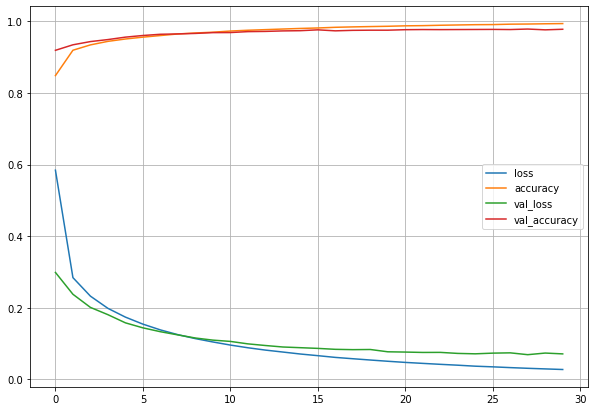

In [27]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [28]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0711 - accuracy: 0.9786


[0.07111521810293198, 0.978600025177002]

In [29]:
model_clf.save("mnist_full.h5")

In [30]:
X_new = X_test[:6]
y_prob = model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 71ms/step


array([[0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.998, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.996, 0.   , 0.   , 0.001, 0.   ,
        0.004],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.   ]], dtype=float32)

In [31]:
X_new.shape

(6, 28, 28)

In [32]:
y_prob.shape

(6, 10)

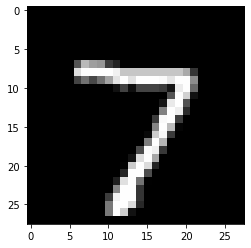

In [33]:
plt.imshow(X_new[0],cmap="gray")

In [34]:
y_pred=np.argmax(y_prob,axis=1)
y_pred

array([7, 2, 1, 0, 4, 1])

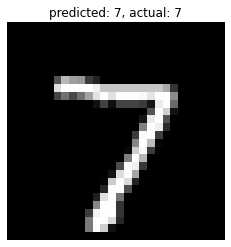

------------------------------------------------------------


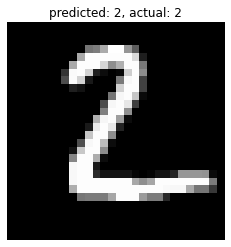

------------------------------------------------------------


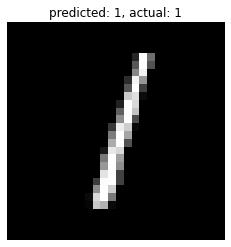

------------------------------------------------------------


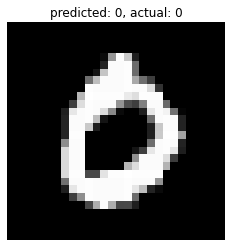

------------------------------------------------------------


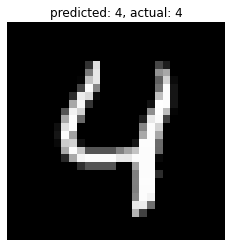

------------------------------------------------------------


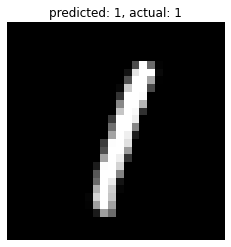

------------------------------------------------------------


In [35]:
for img_array,pred,actual in zip(X_new,y_pred,y_test[:6]):
  plt.imshow(img_array,cmap="gray")
  plt.title(f"predicted: {pred}, actual: {actual}")
  plt.axis("off")
  plt.show()
  print("--"*30)

In [36]:
y_train.shape

(55000,)

In [37]:
y_train[1]

3

# Transfer Learning model

## New problem statement

Classify handwritten digits into odd and even

In [38]:
pretrained_model= tf.keras.models.load_model("mnist_full.h5")

In [39]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenlayer02 (Dense)       (None, 100)               30100     
                                                                 
 ouputlayer (Dense)          (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [40]:
for layer in pretrained_model.layers:
  print(layer)

In [41]:
for layer in pretrained_model.layers:
  print(layer.name)

Inputlayer
hiddenLayer01
hiddenlayer02
ouputlayer


In [42]:
for layer in pretrained_model.layers:
  print(f"{layer.name}:{layer.trainable}")

Inputlayer:True
hiddenLayer01:True
hiddenlayer02:True
ouputlayer:True


In [43]:
for layer in pretrained_model.layers[:-1]:
  print(f"{layer.name}:{layer.trainable}")

Inputlayer:True
hiddenLayer01:True
hiddenlayer02:True


In [44]:
for layer in pretrained_model.layers[:-1]:
  layer.trainable=False

In [45]:
for layer in pretrained_model.layers:
  print(f"{layer.name}:{layer.trainable}")

Inputlayer:False
hiddenLayer01:False
hiddenlayer02:False
ouputlayer:True


In [46]:
lower_layers_pretrained_model=pretrained_model.layers[:-1]

In [47]:
new_model = tf.keras.models.Sequential(lower_layers_pretrained_model)

In [48]:
new_model.add(
    tf.keras.layers.Dense(2,activation="softmax")
    )

In [49]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenlayer02 (Dense)       (None, 100)               30100     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [50]:
def update_even_odd_labels(labels):
  for idx, label in enumerate(labels):
    labels[idx]=np.where(label%2==0,1,0)#1->Even 0->odd
  return labels

In [51]:
y_train_bin,y_test_bin,y_valid_bin = update_even_odd_labels([y_train,y_test,y_valid])

In [52]:
np.unique(y_train_bin)

array([0, 1])

In [53]:
new_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"]
                  )

In [54]:
history = new_model.fit(
    X_train, y_train_bin, epochs=10, validation_data = (X_valid, y_valid_bin)
)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1907 - accuracy: 0.9274 - val_loss: 0.1344 - val_accuracy: 0.9534
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1314 - accuracy: 0.9536 - val_loss: 0.1200 - val_accuracy: 0.9576
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1215 - accuracy: 0.9568 - val_loss: 0.1195 - val_accuracy: 0.9604
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1166 - accuracy: 0.9586 - val_loss: 0.1111 - val_accuracy: 0.9618
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1133 - accuracy: 0.9600 - val_loss: 0.1087 - val_accuracy: 0.9596
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1108 - accuracy: 0.9610 - val_loss: 0.1065 - val_accuracy: 0.9642
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1089 - accuracy: 0.9610 - val_loss: 0.1073 - val_accuracy:

In [55]:
new_model.evaluate(X_test,y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 0.1155 - accuracy: 0.9589


[0.11546748131513596, 0.958899974822998]

In [56]:
X_new = X_test[:3]
y_prob = new_model.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 46ms/step


array([[0.998, 0.002],
       [0.   , 1.   ],
       [0.989, 0.011]], dtype=float32)

In [57]:
y_pred=np.argmax(y_prob,axis=1)
y_pred

array([0, 1, 0])

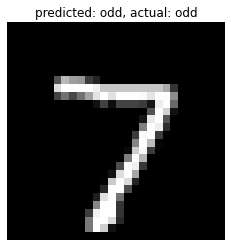

------------------------------------------------------------


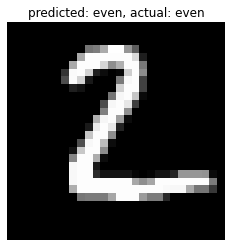

------------------------------------------------------------


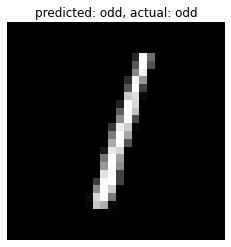

------------------------------------------------------------


In [58]:
for img_array,pred,actual in zip(X_new,y_pred,y_test_bin[:6]):
  if pred==1:
    pred="even"
  else:
    pred="odd"

  if actual==1:
    actual="even"
  else:
    actual="odd"
  plt.imshow(img_array,cmap="gray")
  plt.title(f"predicted: {pred}, actual: {actual}")
  plt.axis("off")
  plt.show()
  print("--"*30)

# Train A CNN model on MNIST data

In [59]:
X_train[0].shape

(28, 28)

In [60]:
X_train_CNN = np.expand_dims(X_train,-1)
X_test_CNN = np.expand_dims(X_test,-1)
X_valid_CNN = np.expand_dims(X_valid,-1)

In [61]:
X_train_CNN.shape

(55000, 28, 28, 1)

In [62]:
X_train_CNN[0].shape

(28, 28, 1)

In [63]:
input_shape=(28,28,1) #(row,col,channel)

LAYERS = [
  tf.keras.Input(shape=input_shape),
  tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(CLASSES,activation="softmax")
]

In [64]:
CNN_model = tf.keras.Sequential(
    LAYERS
) 

In [65]:
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [66]:
(3*3*1+1)*32

320

In [67]:
(28-3)//1+1

26

In [68]:
(28-3)//2+1

13

In [69]:
(13-3)//1+1

11

In [70]:
(11-2)//2+1

5

In [71]:
(3*3*32+1)*64

18496

In [72]:
1600*10+10

16010

In [73]:
CNN_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])

In [74]:
history = CNN_model.fit(
    X_train_CNN, y_train, epochs=30, 
    validation_data = (X_valid_CNN, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 13s 4ms/step - loss: 0.5454 - accuracy: 0.8450 - val_loss: 0.2216 - val_accuracy: 0.9364
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1662 - accuracy: 0.9518 - val_loss: 0.1221 - val_accuracy: 0.9666
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1191 - accuracy: 0.9645 - val_loss: 0.0985 - val_accuracy: 0.9714
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0976 - accuracy: 0.9708 - val_loss: 0.0889 - val_accuracy: 0.9738
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0847 - accuracy: 0.9747 - val_loss: 0.0794 - val_accuracy: 0.9776
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0761 - accuracy: 0.9769 - val_loss: 0.0761 - val_accuracy: 0.9790
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0701 - accuracy: 0.9786 - val_loss: 0.0718 - val_accuracy

In [75]:
CNN_model.evaluate(X_test_CNN, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0405 - accuracy: 0.9869


[0.04048191383481026, 0.9868999719619751]

In [76]:
CNN_model.save("CNN_model_full.h5")

In [77]:
X_new_CNN = X_test_CNN[:6]
y_prob_CNN = CNN_model.predict(X_new_CNN)
y_prob_CNN.round(3)

1/1 [==============================] - 0s 92ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [78]:
y_pred_CNN = np.argmax(y_prob_CNN,axis=1)
y_pred_CNN

array([7, 2, 1, 0, 4, 1])

In [79]:
pre_trained_CNN_model = tf.keras.models.load_model("CNN_model_full.h5")

In [80]:
for layer in pre_trained_CNN_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [81]:
for layer in pre_trained_CNN_model.layers:
  print(f"{layer.name}:{layer.trainable}")

conv2d:False
max_pooling2d:False
conv2d_1:False
max_pooling2d_1:False
flatten:False
dense_1:True


In [82]:
lower_layers_pretrained_model_CNN = pre_trained_CNN_model.layers[:-1]

In [83]:
lower_layers_pretrained_model_CNN

In [84]:
new_model_CNN = tf.keras.models.Sequential(lower_layers_pretrained_model_CNN)

In [85]:
new_model_CNN

In [92]:
input_shape

(28, 28, 1)

In [94]:
new_model_CNN.build(input_shape=(26, 26, 32, 1))

In [95]:
new_model_CNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
Total params: 18,816
Trainable params: 0
Non-trainable

In [96]:
new_model_CNN.add(
    tf.keras.layers.Dense(2,activation="softmax")
    )

In [98]:
new_model_CNN.build(input_shape=(26, 26, 32, 1))

In [99]:
new_model_CNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_2 (Dense)             multiple                 

In [100]:
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               